In [33]:
import torch

In [2]:
print(f"torch version: {torch.__version__}")

torch version: 2.4.1


In [3]:
a1 = torch.empty(1)
print(a1)

tensor([0.])


In [5]:
a2 = torch.empty(2)
print(a2)

tensor([0., 0.])


In [6]:
a3 = torch.empty(2, 3)
print(a3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [8]:
a4 = torch.rand(2, 2)
print(a4)

tensor([[0.0099, 0.2755],
        [0.5480, 0.1122]])


In [11]:
a5 = torch.zeros(3)
print(a5)

tensor([0., 0., 0.])


In [14]:
a7 = torch.ones(3)
print(a7)

tensor([1., 1., 1.])


In [15]:
a1 = torch.ones(2, 3)
print(a1)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [17]:
a1.size()

torch.Size([2, 3])

In [21]:
a1.shape

torch.Size([2, 3])

In [22]:
a1.dtype

torch.float32

In [23]:
a2 = torch.ones(2, 3, dtype=torch.float16)

In [24]:
a2.dtype

torch.float16

In [25]:
l1 = [23, 45, 67]
a3 = torch.tensor(l1)

In [27]:
a3.shape

torch.Size([3])

In [35]:
l2= [1, 3.9, 5]
a4 = torch.tensor(l2, dtype=torch.int)
a4.shape

torch.Size([3])

In [36]:
a4.dtype

torch.int32

In [37]:
a4

tensor([1, 3, 5], dtype=torch.int32)

In [39]:
L = [1, 2, 3, 4, 5]
a5 = torch.tensor(L, requires_grad=True, dtype=torch.float32)

In [40]:
a5

tensor([1., 2., 3., 4., 5.], requires_grad=True)

In [41]:
a1 = torch.ones(3)
a2 = torch.zeros(3)

b= a1 + a2 
c = 2 * a1

In [43]:
print(a1)
print(a2)
print(b)
print(c)

tensor([1., 1., 1.])
tensor([0., 0., 0.])
tensor([1., 1., 1.])
tensor([2., 2., 2.])


In [44]:
c.add_(a1)
print(c)

tensor([3., 3., 3.])


In [45]:
a3 = torch.rand(5, 5)
print(a3)

tensor([[0.6139, 0.7828, 0.9920, 0.2115, 0.1632],
        [0.8765, 0.9276, 0.3225, 0.7463, 0.6707],
        [0.2085, 0.4434, 0.5575, 0.9098, 0.5997],
        [0.7493, 0.9207, 0.9347, 0.5103, 0.0998],
        [0.5526, 0.2306, 0.1641, 0.2216, 0.7709]])


In [46]:
a3[:, 0]

tensor([0.6139, 0.8765, 0.2085, 0.7493, 0.5526])

In [47]:
A =torch.rand(5)
print(A)

B= A.numpy()
print(B)
print(type(B))

tensor([0.1421, 0.0403, 0.4708, 0.4063, 0.2667])
[0.14212424 0.04033643 0.47081155 0.40625846 0.26673263]
<class 'numpy.ndarray'>


In [50]:
B[0] = 9
print(A)

tensor([9.0000, 0.0403, 0.4708, 0.4063, 0.2667])


In [52]:
import numpy as np
A = np.ones(5)
B = torch.from_numpy(A)
print(A)
print(B)
print(type(B))

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'torch.Tensor'>


In [2]:
X = torch.rand(4, requires_grad=True)

In [3]:
X.grad_fn

In [3]:
Y = X *2

In [6]:
Y

tensor([1.7100, 1.0361, 0.4910, 0.6558], grad_fn=<MulBackward0>)

In [7]:
Y.grad_fn

In [9]:
Y = X **2

In [10]:
Y

tensor([0.7310, 0.2684, 0.0603, 0.1075], grad_fn=<PowBackward0>)

In [8]:
Y.retain_grad()

In [9]:
Z = Y.mean()

In [10]:
Z

tensor(1.2563, grad_fn=<MeanBackward0>)

In [11]:
Z.grad_fn

In [12]:
Y.grad

In [14]:
X.grad

In [15]:
Z.backward()

In [16]:
X.grad

tensor([0.5000, 0.5000, 0.5000, 0.5000])

In [17]:
Y.grad

tensor([0.2500, 0.2500, 0.2500, 0.2500])

In [20]:
T = torch.rand(5 , requires_grad=True)

In [21]:
X = T ** 2

In [22]:
Y = X ** 2

In [23]:
Z = Y.mean()

In [24]:
X.retain_grad()
Y.retain_grad()

In [28]:
print(X.grad)
print(Y.grad)

print(T.grad)


tensor([0.0585, 0.0037, 0.2868, 0.1642, 0.2435])
tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor([0.0448, 0.0007, 0.4858, 0.2105, 0.3799])


In [26]:
Z.backward()

In [34]:
X = torch.tensor([1.0, 2.0, 3.0, 4.0, 6, 7, 8, 9 , 10], requires_grad=True)
Y = torch.tensor([3.0, 6.0, 9.0, 12.0, 18, 21, 24, 27, 30], requires_grad=True)

W = torch.tensor([1.0], requires_grad=True)

def get_prediction(x):
    return W * x

def compute_loss(y_pred, y_true):
    total_loss = (y_pred - y_true) ** 2
    mean_loss = total_loss.mean()
    return mean_loss

learning_rate = 0.01
max_epochs = 100

for epoch in range(max_epochs):
    y_pred = get_prediction(X)
    current_loss = compute_loss(y_pred, Y)
    current_loss.backward()
    with torch.no_grad():
        W -= learning_rate * W.grad

    print(f"Epoch: {epoch}, Loss: {current_loss:.4f} , W Grad: {W.grad.item():.4f}, W: {W.item():.4f}")
    W.grad.zero_()
    

Epoch: 0, Loss: 160.0000 , W Grad: -160.0000, W: 2.6000
Epoch: 1, Loss: 6.4000 , W Grad: -32.0000, W: 2.9200
Epoch: 2, Loss: 0.2560 , W Grad: -6.4000, W: 2.9840
Epoch: 3, Loss: 0.0102 , W Grad: -1.2800, W: 2.9968
Epoch: 4, Loss: 0.0004 , W Grad: -0.2560, W: 2.9994
Epoch: 5, Loss: 0.0000 , W Grad: -0.0512, W: 2.9999
Epoch: 6, Loss: 0.0000 , W Grad: -0.0102, W: 3.0000
Epoch: 7, Loss: 0.0000 , W Grad: -0.0020, W: 3.0000
Epoch: 8, Loss: 0.0000 , W Grad: -0.0004, W: 3.0000
Epoch: 9, Loss: 0.0000 , W Grad: -0.0001, W: 3.0000
Epoch: 10, Loss: 0.0000 , W Grad: -0.0000, W: 3.0000
Epoch: 11, Loss: 0.0000 , W Grad: 0.0000, W: 3.0000
Epoch: 12, Loss: 0.0000 , W Grad: 0.0000, W: 3.0000
Epoch: 13, Loss: 0.0000 , W Grad: 0.0000, W: 3.0000
Epoch: 14, Loss: 0.0000 , W Grad: 0.0000, W: 3.0000
Epoch: 15, Loss: 0.0000 , W Grad: 0.0000, W: 3.0000
Epoch: 16, Loss: 0.0000 , W Grad: 0.0000, W: 3.0000
Epoch: 17, Loss: 0.0000 , W Grad: 0.0000, W: 3.0000
Epoch: 18, Loss: 0.0000 , W Grad: 0.0000, W: 3.0000
Epoch:

In [35]:
import torch
import torch.nn as nn

In [36]:
X = torch.tensor([[1.0], [2.0], [3.0], [4.0], [6], [7], [8], [9] , [10]], requires_grad=True)
Y = torch.tensor([[3.0], [6.0], [9.0], [12.0], [18], [21], [24], [27], [30]], requires_grad=True)

n, nb_features = X.shape

In [37]:
X_test = torch.tensor([[100.0]], requires_grad=True)

In [38]:
train_data = n
y = nb_features

In [39]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.lin(x)

In [40]:
input_dim , output_dim = nb_features, nb_features
model = LinearRegression(input_dim, output_dim)

In [44]:
learning_rate = 0.01
max_epochs = 200
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [45]:
for epoch in range(max_epochs):
    y_pred = model(X)
    current_loss = loss(y_pred, Y)
    current_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        w,b = model.parameters()
        print(f"Epoch: {epoch}, Loss: {current_loss:.4f}, W: {w.item(): .3f}, B: {b.item()}")

Epoch: 0, Loss: 0.0105, W:  3.030, B: -0.2132243514060974
Epoch: 10, Loss: 0.0096, W:  3.028, B: -0.20386017858982086
Epoch: 20, Loss: 0.0088, W:  3.027, B: -0.1949073076248169
Epoch: 30, Loss: 0.0080, W:  3.026, B: -0.18634767830371857
Epoch: 40, Loss: 0.0073, W:  3.025, B: -0.17816385626792908
Epoch: 50, Loss: 0.0067, W:  3.024, B: -0.17033948004245758
Epoch: 60, Loss: 0.0061, W:  3.023, B: -0.16285869479179382
Epoch: 70, Loss: 0.0056, W:  3.022, B: -0.15570642054080963
Epoch: 80, Loss: 0.0051, W:  3.021, B: -0.14886829257011414
Epoch: 90, Loss: 0.0047, W:  3.020, B: -0.14233051240444183
Epoch: 100, Loss: 0.0043, W:  3.019, B: -0.1360798180103302
Epoch: 110, Loss: 0.0039, W:  3.018, B: -0.1301036924123764
Epoch: 120, Loss: 0.0036, W:  3.017, B: -0.12438992410898209
Epoch: 130, Loss: 0.0033, W:  3.017, B: -0.11892707645893097
Epoch: 140, Loss: 0.0030, W:  3.016, B: -0.113704152405262
Epoch: 150, Loss: 0.0027, W:  3.015, B: -0.10871060937643051
Epoch: 160, Loss: 0.0025, W:  3.015, B: -

In [46]:
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [48]:
# image size 28 x 28
nb_classes = 10
batch_size = 100
epochs = 2

In [49]:
x_train =torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
x_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [50]:
train_loader = torch.utils.data.DataLoader(dataset=x_train, batch_size=batch_size, shuffle=True)

In [51]:
x_test_loader = torch.utils.data.DataLoader(dataset=x_test, batch_size=batch_size, shuffle=False)

In [52]:
examples = iter(train_loader)

In [54]:
images, labels = next(examples)

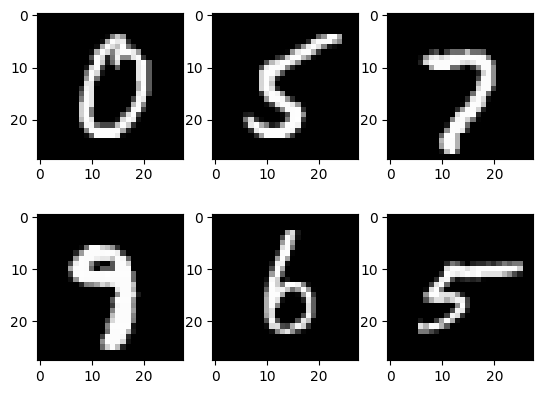

In [55]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i][0], cmap='gray')
    
plt.show()

In [56]:
class SimpleNN(nn.Module):
    def __init__(self, nb_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, nb_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [57]:
simple_nn = SimpleNN(nb_classes).to(device)

In [58]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(simple_nn.parameters(), lr=0.01)
nb_images = len(train_loader)

In [59]:
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        
        
        outputs = simple_nn(images)
        current_loss = loss(outputs, labels)
        current_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if (i+1) % 100 == 0:
            print(f"Epoch: {epoch}, Batch: {i+1}/{nb_images}, Loss: {current_loss.item()}")

Epoch: 0, Batch: 100/600, Loss: 0.3506682515144348
Epoch: 0, Batch: 200/600, Loss: 0.20977267622947693
Epoch: 0, Batch: 300/600, Loss: 0.21517015993595123
Epoch: 0, Batch: 400/600, Loss: 0.18938155472278595
Epoch: 0, Batch: 500/600, Loss: 0.15026728808879852
Epoch: 0, Batch: 600/600, Loss: 0.025067990645766258
Epoch: 1, Batch: 100/600, Loss: 0.040147460997104645
Epoch: 1, Batch: 200/600, Loss: 0.1178661659359932
Epoch: 1, Batch: 300/600, Loss: 0.15396419167518616
Epoch: 1, Batch: 400/600, Loss: 0.07707914710044861
Epoch: 1, Batch: 500/600, Loss: 0.08131438493728638
Epoch: 1, Batch: 600/600, Loss: 0.12119735777378082


In [60]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in x_test_loader:
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = simple_nn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print(f"Accuracy: {100 * correct/total}")

Accuracy: 96.18
